# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## IV. Simulations du modèle complet sur l'optimisation du coût du mix énergétique

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time
import sys

# Imports pour pyomo
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

import panel as pn 
from ipywidgets import interactive, interact_manual
import ipywidgets as widgets

#%matplotlib inline
pn.extension()

from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

### 1. Utils

In [2]:
col = {"offshore" : '#1f4e79', "onshore" : '#548235' , "pv" : "#ffc000", "phs" : "#bdd7ee", "battery" : "#7030a0", "biogas" :"#843c0c", "methanation": "#7f6000", "gas": "grey", "lake": "#4169E1", "river" : "#09F1D3"}
tec = ["offshore","onshore","pv","river","lake","biogas","phs","battery","methanation"]
stor = ["phs","battery","methanation"]

In [3]:
# Dashboard

# Dashboard

def show_dossier(week,name):
    
    if name == "scen2006": 
        d = scen2006
        Volume = Volume_str_opti 
    else :
        d = pd.read_csv("Simulations_completes/"+name+"/"+name+"_hourly_generation.csv", index_col = 0, squeeze = True)
        Volume = pd.read_csv("Simulations_completes/"+name+"/"+name+"_Volume.csv", index_col = 0, squeeze = True)
        
    tec_aux = tec
    if not("river" in d.columns): tec_aux = list(set(tec_aux) - set(["river"]))
    if not("lake" in d.columns): tec_aux = list(set(tec_aux) - set(["lake"]))
    
    h  = 168*(week-1) + np.arange(1,169)
    ymin, ymax = -45,130
    h_ratio = np.ones(len(stor)+1)
    h_ratio[0] = 2 # 1er subplot 2 fois plus grand
    fig, axs = plt.subplots(len(stor)+1, figsize = (15,15),gridspec_kw={'height_ratios':h_ratio})
    
    # Stockage 
    sum_s = 0
    for i in stor: 
        sum_s += d["Storage " + i][h]
    for s in stor[::-1]:
        aux = "Storage " + s
        axs[0].fill_between(h, sum_s, color = col[s], label = aux)
        sum_s -= d[aux][h]

    # Production
    sum_g = 0
    for i in tec_aux: 
        sum_g += d[i][h]
    for gene in tec_aux[::-1]: 
        axs[0].fill_between(h,sum_g, color = col[gene], label = gene )
        sum_g -= d[gene][h]
    
    # Demande
    axs[0].plot(h, d["Electricity demand"][h], color = 'r' , label = "Demand",linewidth= 4)

    axs[0].vlines(x=np.linspace(h[0],h[-1],8),ymin = ymin, ymax = ymax,colors="black",linestyle='dotted',linewidth=2)
    axs[0].set_ylabel("Production (GWh)")
    axs[0].set_ylim(ymin,ymax)
    axs[0].legend(loc ="upper right")
    axs[0].set_title("Semaine "+ str(week))
        
    for s in range(0,len(stor)):
        axs[s+1].fill_between(h, d["Stored " + stor[s]][h], color = col[stor[s]])
        axs[s+1].hlines(y=Volume[s], xmin = h[0], xmax = h[-1], label = "limit", color = 'red')
        axs[s+1].set_title("Stored " + str(stor[s]))
        axs[s+1].vlines(x=np.linspace(h[0],h[-1],8),ymin = 0, ymax = Volume[s]+10,colors="black",linestyle='dotted',linewidth=2)
        
def affichage(simu):
    print(" --- Q ---")
    for i in simu.model.Q:
        print(i," : ",pyo.value(simu.model.Q[i]))   
    print(" --- S ---")   
    for i in simu.model.S:
        print(i," : ",pyo.value(simu.model.S[i]))
    print(" --- volume ---")
    for i in simu.model.volume:
        print(i," : ",pyo.value(simu.model.volume[i]))
    print(" --- cost --- ")
    print(simu.cost())

In [4]:
rte = pd.read_csv("inputs/demand2050_rte.csv")
#rte
ademe = pd.read_csv("inputs/demand2050_ademe.csv")
#ademe

### 2. Simulations du modèle complet
Optimisation des variables Q, S et VOLUME  
Optimisation du mix énergétique

In [5]:
from modeles_complet import modele_complet

##### Demande de RTE

In [6]:
simu4 = modele_complet()
simu4.load_param("inputs/")
simu4.run()
affichage(simu4)

Chargement des paramètres ...
Demande de RTE
Initialisation des sets...
Définition des variables à optimiser ...
Ajout des contraintes ...
Optimisation ...
Simulation du modèle faite avec succès ! 
 --- Q ---
offshore  :  20.0
onshore  :  120.0
pv  :  153.59165
river  :  7.5
lake  :  12.855
biogas  :  100.0
phs  :  6.3936009
battery  :  33.875077
methanation  :  100.0
 --- S ---
phs  :  6.2
battery  :  33.875077
methanation  :  10.991424
 --- volume ---
phs  :  135.5
battery  :  186.77956
methanation  :  13863.189
 --- cost --- 
   COST (billion euros)  Cost per MWh produced (euros/MWh)
0              29.21422                           0.000041


In [7]:
#seconds = time.time()
#print("Seconds since epoch =", seconds)
#9 minutes

Seconds since epoch = 1643207585.394527


In [8]:
res4 = simu4.write_results('simu_complet_rte')

Ecriture des résultats ...


##### Demande de l'ADEME

In [6]:
simu3 = modele_complet()
simu3.load_param("inputs/")
simu3.run()
affichage(simu3)

Chargement des paramètres ...
Demande de l'ADEME
Initialisation des sets...
Définition des variables à optimiser ...
Ajout des contraintes ...
Optimisation ...
Simulation du modèle faite avec succès ! 
 --- Q ---
offshore  :  20.0
onshore  :  70.232461
pv  :  113.02977
river  :  7.5
lake  :  12.855
biogas  :  100.0
phs  :  5.7047192
battery  :  13.342673
methanation  :  100.0
 --- S ---
phs  :  6.2
battery  :  13.342673
methanation  :  7.5578763
 --- volume ---
phs  :  135.5
battery  :  64.590658
methanation  :  7992.0289
 --- cost --- 
   COST (billion euros)  Cost per MWh produced (euros/MWh)
0                19.801                           0.000038


In [7]:
res3 = simu3.write_results('simu_complet_ademe')

Ecriture des résultats ...


##### Demande de Négawatt

In [6]:
simu2 = modele_complet()
simu2.load_param("inputs/")
simu2.run()
affichage(simu2)

Chargement des paramètres ...
Demande de Negawatt
Initialisation des sets...
Définition des variables à optimiser ...
Ajout des contraintes ...
Optimisation ...
Simulation du modèle faite avec succès ! 
 --- Q ---
offshore  :  9.2239836
onshore  :  35.15861
pv  :  69.845534
river  :  7.5
lake  :  12.855
biogas  :  100.0
phs  :  3.8188538
battery  :  7.6920943
methanation  :  100.0
 --- S ---
phs  :  6.2
battery  :  7.6920943
methanation  :  0.0
 --- volume ---
phs  :  135.5
battery  :  35.682432
methanation  :  0.0
 --- cost --- 
   COST (billion euros)  Cost per MWh produced (euros/MWh)
0              10.49522                           0.000034


In [7]:
res2 = simu2.write_results('simu_complet_negawatt')

Ecriture des résultats ...


### 3. Affichage des résultats avec le modèle complet

interactive(children=(IntText(value=1, description='week'), Dropdown(description='name', options=('simu_comple…

<function __main__.show_dossier(week, name)>

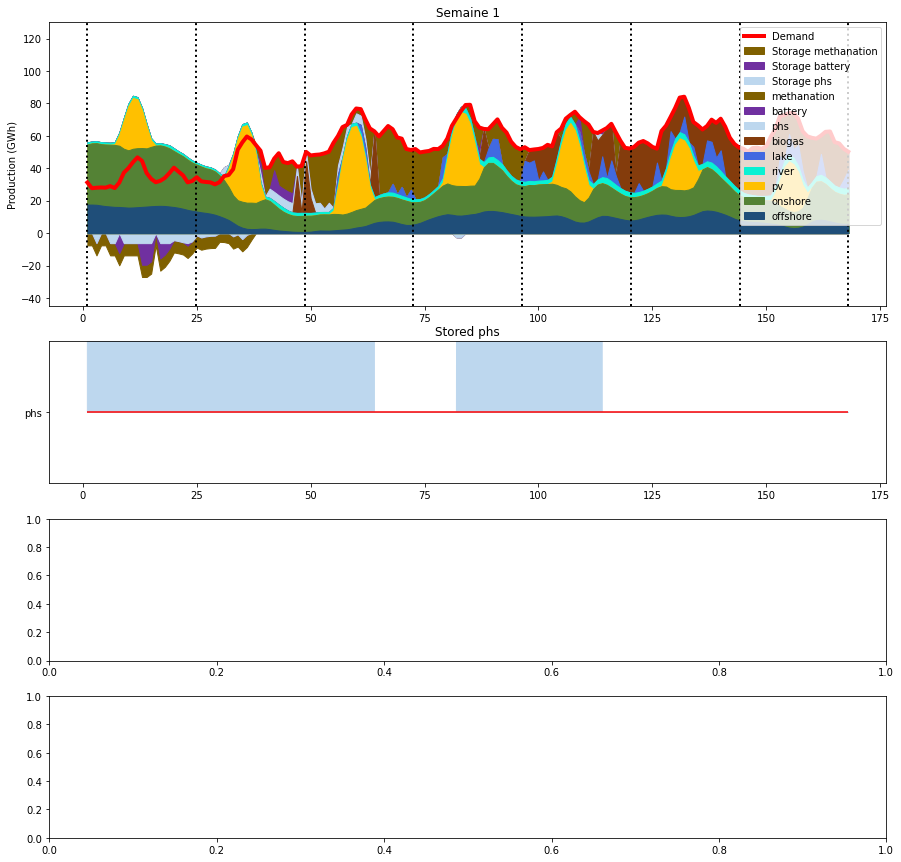

In [9]:
noms_simu = ["simu_complet_rte", "simu_complet_ademe", "simu_complete_negawatt"]
# Dashboard
interactive_plot = interact_manual(show_dossier, week=widgets.IntText(value = 1), name = noms_simu)
interactive_plot